In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.options.display.precision = 2
pd.options.display.max_colwidth = 400

In [3]:
conferences = ['AAAI', 'IJCAI', 'NeurIPS']

In [4]:
all_papers = pd.read_csv('datasets/ai_titles_v2022.csv', usecols = ['paper_title', 'num_of_citations', 'conference', 'year', 'is_link'])
all_papers.shape

(25693, 5)

In [5]:
all_papers = all_papers[all_papers['is_link'] == True]
all_papers.shape

(25693, 5)

In [6]:
all_papers.head(100)

,paper_title,num_of_citations,conference,year,is_link
0,Value ordering for finding all solutions,44,IJCAI,2005,True
1,A Conceptual Graph Approach for the Generation of Referring Expressions.,31,IJCAI,2007,True
2,Exploiting image contents in web search.,34,IJCAI,2007,True
3,Best-First Utility-Guided Search.,31,IJCAI,2007,True
4,Ambiguous part-of-speech tagging for improving accuracy and domain portability of syntactic parsers.,30,IJCAI,2007,True
...,...,...,...,...,...
95,Praiseworthy Acts Recognition Using Web-based Knowledge and Semantic Categories,1,IJCAI,2016,True
96,Extracting protein-reaction information from tables of unpredictable format and content in the molecular biology literature,1,IJCAI,2016,True
97,Preliminary study towards a fuzzy model for visual attention,1,IJCAI,2015,True
98,Decision-theoretic planning with linguistic terms in GOLOG,1,IJCAI,2015,True


In [7]:
len(all_papers[~all_papers['year'].str.isdecimal()])

118

In [8]:
# show non-numerial values
all_papers = all_papers[all_papers['year'].str.isdecimal()]

In [9]:
# all_papers[all_papers['paper_title'].str.strip().str[-1] == "."]

In [10]:
all_papers['paper_title'] = all_papers['paper_title'].apply(lambda x: x.strip()[:-1] if x.strip()[-1] == "." else x.strip())

In [11]:
# all_papers[all_papers['paper_title'].str.strip().str[-1] == "."]

In [12]:
all_papers.head(100)

,paper_title,num_of_citations,conference,year,is_link
0,Value ordering for finding all solutions,44,IJCAI,2005,True
1,A Conceptual Graph Approach for the Generation of Referring Expressions,31,IJCAI,2007,True
2,Exploiting image contents in web search,34,IJCAI,2007,True
3,Best-First Utility-Guided Search,31,IJCAI,2007,True
4,Ambiguous part-of-speech tagging for improving accuracy and domain portability of syntactic parsers,30,IJCAI,2007,True
...,...,...,...,...,...
95,Praiseworthy Acts Recognition Using Web-based Knowledge and Semantic Categories,1,IJCAI,2016,True
96,Extracting protein-reaction information from tables of unpredictable format and content in the molecular biology literature,1,IJCAI,2016,True
97,Preliminary study towards a fuzzy model for visual attention,1,IJCAI,2015,True
98,Decision-theoretic planning with linguistic terms in GOLOG,1,IJCAI,2015,True


In [13]:
all_papers[all_papers.duplicated() == True]

,paper_title,num_of_citations,conference,year,is_link
4450,Discovering music structure via similarity fusion,2,NeurIPS,2007,True
11139,Multimedia Information Extraction Roadmap,0,AAAI,2008,True
11142,Multimedia Information Extraction Roadmap,0,AAAI,2008,True
13650,"Integration of Visuomotor Learning, Cognitive Grasping and Sensor-Based Physical Interaction in the UJI Humanoid Torso",0,AAAI,2013,True
14170,Invited Talks,0,AAAI,2013,True
15972,Actionable Ethics through Neural Learning,0,AAAI,2020,True
18358,Maximum Likelihood Embedding of Logistic Random Dot Product Graphs,0,AAAI,2020,True
19467,AAAI-13 Preface,0,AAAI,2013,True
19868,The Metacognitive Loop: An Architecture for Building Robust Intelligent Systems,1,AAAI,2010,True
21062,Invited Talks,0,AAAI,2012,True


In [14]:
all_papers['year'] = all_papers['year'].apply(lambda x: int(x))

In [15]:
all_papers.describe()

,num_of_citations,year
count,25575.00,25575.00
mean,35.52,2012.97
std,146.46,5.74
min,0.00,2000.00
25%,3.00,2008.00
50%,9.00,2015.00
75%,28.00,2018.00
max,9432.00,2020.00


In [16]:
for conf in conferences:
    conf_papers = all_papers[all_papers['conference'] == conf]
    print(conf)
    print(conf_papers.describe(), "\n")
#     print("Number of papers with 0 citations", len(conf_papers[conf_papers['num_of_citations'] == 0]))
#     print("Number of papers with 1 citations", len(conf_papers[conf_papers['num_of_citations'] == 1]), "\n")

AAAI
       num_of_citations      year
count          18407.00  18407.00
mean              34.34   2013.08
std              148.15      5.66
min                0.00   2000.00
25%                3.00   2009.00
50%               10.00   2014.00
75%               28.00   2018.00
max             9432.00   2020.00 

IJCAI
       num_of_citations     year
count           4237.00  4237.00
mean              31.63  2012.87
std              105.67     6.25
min                0.00  2000.00
25%                3.00  2007.00
50%               10.00  2016.00
75%               27.00  2018.00
max             3739.00  2020.00 

NeurIPS
       num_of_citations     year
count           2931.00  2931.00
mean              48.56  2012.44
std              181.73     5.48
min                0.00  2000.00
25%                2.00  2009.00
50%                7.00  2013.00
75%               31.00  2017.00
max             5185.00  2020.00 



In [17]:
not_used = all_papers[(all_papers['year'] >= 2018) & (all_papers['year'] <= 2020)]

papers = all_papers[(all_papers['year'] >= 2000) & (all_papers['year'] <= 2017)]

In [18]:
not_used.describe()

,num_of_citations,year
count,7430.00,7430.00
mean,21.91,2019.03
std,62.18,0.82
min,0.00,2018.00
25%,2.00,2018.00
50%,8.00,2019.00
75%,20.00,2020.00
max,1718.00,2020.00


In [19]:
papers.describe()

,num_of_citations,year
count,18145.00,18145.00
mean,41.10,2010.49
std,168.96,5.01
min,0.00,2000.00
25%,3.00,2007.00
50%,10.00,2011.00
75%,32.00,2015.00
max,9432.00,2017.00


In [20]:
for conf in conferences:
    conf_papers = papers[papers['conference'] == conf]
    print(conf)
    print(conf_papers.describe(), "\n")

AAAI
       num_of_citations      year
count          13034.00  13034.00
mean              38.08   2010.59
std              169.99      4.86
min                0.00   2000.00
25%                3.00   2007.00
50%               10.00   2011.00
75%               30.00   2015.00
max             9432.00   2017.00 

IJCAI
       num_of_citations     year
count           2860.00  2860.00
mean              39.72  2010.09
std              126.81     5.82
min                0.00  2000.00
25%                4.00  2005.00
50%               12.00  2009.00
75%               35.00  2016.00
max             3739.00  2017.00 

NeurIPS
       num_of_citations     year
count           2251.00  2251.00
mean              60.32  2010.44
std              204.82     4.66
min                0.00  2000.00
25%                3.00  2007.00
50%               11.00  2011.00
75%               41.00  2014.00
max             5185.00  2017.00 



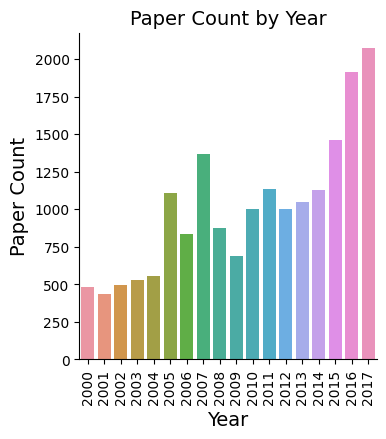

In [21]:
g = sns.catplot(data=papers, x="year", kind="count", height=4)
g.set_xticklabels(rotation=90)
plt.ylabel("Paper Count", size=14)
plt.xlabel("Year", size=14)
plt.title("Paper Count by Year", size=14)
plt.show()

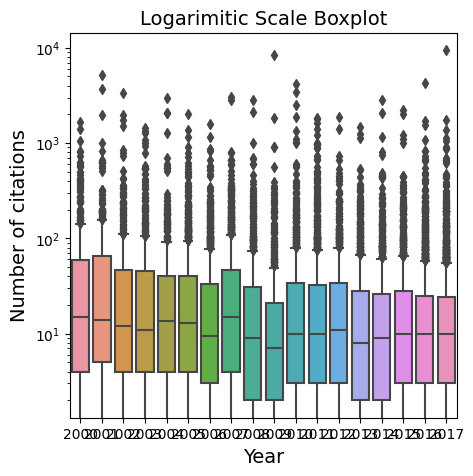

In [22]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.boxplot(x="year", y="num_of_citations", data=papers)
g.set(yscale="log")
# g.set_xticklabels(rotation=90)
plt.ylabel("Number of citations", size=14)
plt.xlabel("Year", size=14)
plt.title("Logarimitic Scale Boxplot", size=14)
plt.show()

In [23]:
# g = sns.catplot(data=papers, x="conference", kind="count", height=6)
# g.set_xticklabels(rotation=90)
# plt.ylabel("Paper Count", size=14)
# plt.xlabel("Year", size=14)
# plt.title("Paper Count by Year", size=14)
# plt.show()

In [24]:
# g = sns.catplot(data=papers, x="conference", y="num_of_citations", kind="box", height=6, aspect = .8)
# g.set(yscale="log")
# plt.ylabel("Number of citations", size=14)
# plt.xlabel("Year", size=14)
# plt.title("Logarimitic Scale Boxplot", size=14)
# plt.show()

In [25]:
# g = sns.catplot(x="year", y="num_of_citations", data=papers, height=6)
# g.set_xticklabels(rotation=90)
# plt.ylabel("Number of citations", size=14)
# plt.xlabel("Year", size=14)
# plt.title("Jitter scatterplot", size=14)
# plt.show()

In [26]:
papers.nlargest(10, 'num_of_citations')

,paper_title,num_of_citations,conference,year,is_link
17031,"Inception-v4, inception-resnet and the impact of residual connections on learning",9432,AAAI,2017,True
15169,Gephi: an open source software for exploring and manipulating networks,8316,AAAI,2009,True
5347,Laplacian eigenmaps and spectral techniques for embedding and clustering,5185,NeurIPS,2001,True
15651,Deep reinforcement learning with double q-learning,4303,AAAI,2016,True
24343,Measuring user influence in twitter: The million follower fallacy,4201,AAAI,2010,True
1642,An empirical study of the naive Bayes classifier,3739,IJCAI,2001,True
24345,Predicting elections with twitter: What 140 characters reveal about political sentiment,3476,AAAI,2010,True
20109,FastSLAM: A factored solution to the simultaneous localization and mapping problem,3391,AAAI,2002,True
5348,Random Features for Large-Scale Kernel Machines,3045,NeurIPS,2007,True
22082,MDA: A formal approach to game design and game research,2986,AAAI,2004,True


In [27]:
# papers.to_csv('papers_ai_00-17.csv', index=False)